# Лабораторная работа №2
## по предмету Компьютерная геометрия и геометрическое моделирование
- Студент Ф.И.О: **Мерич Дорук Каймакджыоглу**.
- Студ Ноиер: **1032204917**.
- Группа: **НКНбд-01-20**.

***Задание №1:*** Реализовать повороты произвольного многоугольника на заданный угол вокруг центра координат. Создать две версии программы: первая версия должна использовать матрицы для поворота, а вторая комплексные числа. Программа должна работать так, чтобы можно было легко изменить набор вершин многоугольника и указать любой угол поворота.

***Задание №4:*** Первые два задания анимировать (создать видео) или использовать ползунок для изменения угла с шагом в 1 градус (можно и меньше).

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def rotate_complex(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation = np.exp(1j * angle_radians)
    rotated_points = points * rotation
    return rotated_points

def rotate_matrix(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                [np.sin(angle_radians), np.cos(angle_radians)]])
    rotated_points = np.dot(points, rotation_matrix.T)
    return rotated_points

rotation_angles = np.arange(0, 360, 1)
# From complex numbers:
polygon_comp = np.array([0.5 + 0.6j, 2 + 1j, 2 + 2.3j, 1.5 + 2.6j, 1 + 2.1j, 0.5 + 0.6j]) # abnormal pentagon
# polygon_comp = np.array([1 + 1j, 2 + 1j, 2.5 + 1.5j, 2 + 2j, 1 + 2j, 0.5 + 1.5j, 1 + 1j]) # hexagon
# polygon_comp = np.array([1.5 + 0.5j, 2.5 + 0.5j, 2.5 + 1.5j, 1.5 + 1.5j, 1.5 + 0.5j]) # square
# From array:
polygon_arr = np.array([[0.5, 0.6], [2, 1], [2, 2.3], [1.5, 2.6], [1, 2.1], [0.5, 0.6]]) # abnormal pentagon
# polygon_arr = np.array([[1, 1], [2, 1], [2.5, 1.75], [2, 2.5], [1, 2.5], [0.5, 1.75], [1, 1]]) # hexagon
# polygon_arr = np.array([[1, 1], [2, 1], [2, 2], [1, 2], [1, 1]]) # square
rotated_polygons = [rotate_matrix(polygon_arr, angle) for angle in rotation_angles]

def update_comp(angle):
    plt.clf()
    rotated_polygon = rotate_complex(polygon_comp, angle)
    plt.plot(np.real(polygon_comp), np.imag(polygon_comp), label='Исходный многоугольник', marker='o')
    plt.plot(np.real(rotated_polygon), np.imag(rotated_polygon), label='Повернутый многоугольник', marker='o')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.title("используя комплексные числа")
    
def update_arr(angle):
    plt.clf()
    plt.plot(polygon_arr[:, 0], polygon_arr[:, 1], label='Исходный многоугольник', marker='o')
    plt.plot(rotated_polygons[angle][:, 0], rotated_polygons[angle][:, 1], label='Повернутый многоугольник', marker='o')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.title("используя матрицы")

@interact(angle=(0, 360, 1))
def animate_polygon_comp(angle=45):
    update_comp(angle)
    plt.show()

@interact(angle=(0, 359, 1))
def animate_polygon_arr(angle=45):
    update_arr(angle)
    plt.show()

interactive(children=(IntSlider(value=45, description='angle', max=360), Output()), _dom_classes=('widget-inte…

interactive(children=(IntSlider(value=45, description='angle', max=359), Output()), _dom_classes=('widget-inte…

***Задание №2:*** Реализовать повороты произвольного массива точек на произвольный угол вокруг заданной точки. Используйте или **матрицы**, или комплексные числа. Что на ваш взгляд удобнее использовать в Matplotlib и почему? Дополнительно отобразите центр поворота, дугу окружности и радиус. Радиус проведите от центра поворота к центру масс вращаемого массива точек. Визуально проверьте работу программы, взяв массив из трех точек и нарисовав треугольник. Отобразите треугольник до поворота и после.

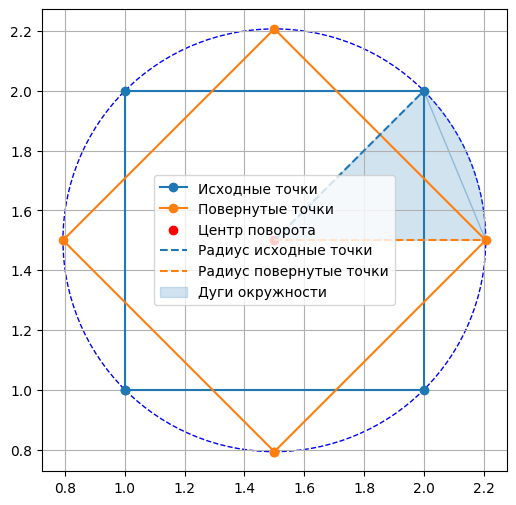

In [85]:
def rotate_matrix(points, angle_degrees, center):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                [np.sin(angle_radians), np.cos(angle_radians)]])
    centered_points = points - center
    rotated_points = np.dot(centered_points, rotation_matrix.T) + center
    return rotated_points

points = np.array([[1, 1], [2, 1], [2, 2], [1, 2], [1, 1]])

rotation_angle = 45
center = np.array([1.5, 1.5]) 

rotated_points = rotate_matrix(points, rotation_angle, center)
radius_original = np.sqrt(np.sum((points[0] - center) ** 2))
radius_rotated = np.sqrt(np.sum((rotated_points[0] - center) ** 2))
theta = np.linspace(0, np.radians(rotation_angle), 100)
arc_x = center[0] + radius_original * np.cos(theta)
arc_y = center[1] + radius_original * np.sin(theta)
x = np.array([[center[0],center[1]] ,[points[2][0],points[2][1]], [rotated_points[1][0],rotated_points[1][1]]])

plt.figure(figsize=(6, 6))
plt.plot(points[:, 0], points[:, 1], label='Исходные точки', marker='o')
plt.plot(rotated_points[:, 0], rotated_points[:, 1], label='Повернутые точки', marker='o')
plt.scatter(center[0], center[1], color='red', label='Центр поворота')


radius = np.sqrt(np.sum((points[0] - center) ** 2))
plt.plot([center[0], points[2][0]], [center[1], points[2][1]], linestyle='--', color='tab:blue', label='Радиус исходные точки')
plt.plot([center[0], rotated_points[1][0]], [center[1], rotated_points[1][1]], linestyle='--', color='tab:orange', label='Радиус повернутые точки')
circle = plt.Circle(center, radius, fill=False, color='blue', linestyle='--')
plt.gca().add_patch(circle)
plt.fill(arc_x, arc_y, color='tab:blue', alpha=0.2)
polygon = plt.Polygon(x[:,:], fill=True, color='tab:blue', alpha=0.2, label="Дуги окружности")
plt.gca().add_patch(polygon)

plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

 ***Задание №3:*** Реализуйте отражение произвольного многоугольника относительно прямой, проходящей через центр координат под заданным углом. Покажите, что два отражения подряд относительно двух прямых эквивалентно одному повороту. Каков угол такого поворота? Используйте на выбор или комплексные числа, или матрицы с векторами.

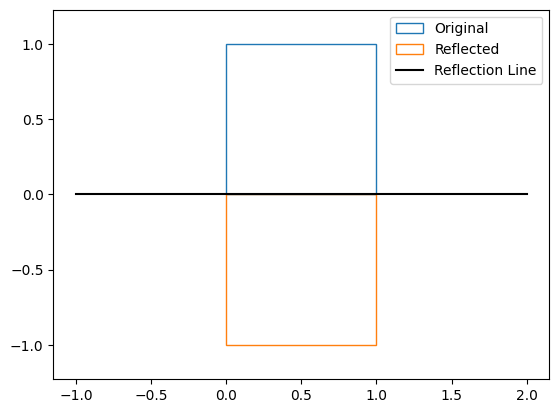

In [47]:
def rotate_matrix(matrix, angle_deg):
    
    angle_rad = np.deg2rad(angle_deg)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    
    rotated_matrix = np.dot(matrix, rotation_matrix)
    return rotated_matrix

def reflect_polygon(vertices, angle_deg):
    rotated_vertices = rotate_matrix(vertices, -angle_deg)

    reflected_vertices = [(x, -y) for (x, y) in rotated_vertices]

    reflected_rotated_vertices = rotate_matrix(reflected_vertices, angle_deg)

    return reflected_rotated_vertices

polygon_vertices = [(0, 0), (1, 0), (1, 1), (0, 1)]
reflection_angle = 180  

reflected_vertices = reflect_polygon(polygon_vertices, reflection_angle)

polygon = plt.Polygon(polygon_vertices, fill=None, color="tab:blue", label='Original')
plt.gca().add_patch(polygon)

reflected_polygon = plt.Polygon(reflected_vertices, fill=None, color="tab:orange", label='Reflected')
plt.gca().add_patch(reflected_polygon)

x = np.linspace(-1, 2, 200)
y = x * np.tan(np.deg2rad(reflection_angle))
plt.plot(x, y, 'k-', label='Reflection Line')
plt.axis('equal')
plt.legend()
plt.show()

***Задание №5:*** Запрограммировать плоскую кинематическую пару. Исходные данные: длины двух звеньев и углы поворота звеньев относительно друг друга.

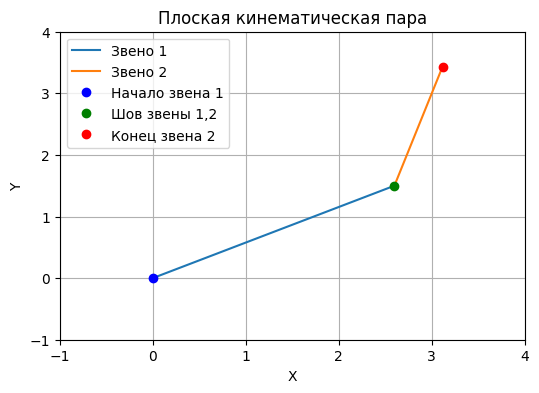

In [46]:
l1 = 3.0 
l2 = 2.0 
theta1 = np.deg2rad(30)  
theta2 = np.deg2rad(45)  

x_end = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
y_end = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)

plt.figure(figsize=(6, 4))
plt.plot([0, l1 * np.cos(theta1)], [0, l1 * np.sin(theta1)], label='Звено 1')
plt.plot([l1 * np.cos(theta1), x_end], [l1 * np.sin(theta1), y_end], label='Звено 2')
plt.plot(0, 0, 'bo', label='Начало звена 1') 
plt.plot(l1 * np.cos(theta1), l1 * np.sin(theta1), 'go', label='Шов звены 1,2') 
plt.plot(x_end, y_end, 'ro', label='Конец звена 2')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Плоская кинематическая пара')
plt.show()

***Задание №6:*** Используя кинематическую пару анимировать произвольную циклоидальную кривую. Программа должна уметь рисовать любую такую кривую.

In [86]:
import matplotlib.animation as animation
from ipywidgets import interact

# Parameters for the cycloidal curve
R = 0.4
r = 1
d = 1
k = 4
n = 1

l1 = 1.0 
l2 = 0.0 
theta1 = np.deg2rad(30)  
theta2 = np.deg2rad(45)  
x_end = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2)
y_end = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2)
# Calculate the cycloidal curve points
t = np.linspace(0, 2 * np.pi * n, 1000)
x_cycloidal = R * (t - np.sin(t))
y_cycloidal = R * (1 - np.cos(t))
plt.figure(figsize=(10, 10))
def animate(frame=300):
    plt.clf()
    plt.plot([0, l1 * np.cos(theta1) + x_cycloidal[frame]], [0, l1 * np.sin(theta1) + y_cycloidal[frame]], label='Звено 1')
    plt.plot([l1 * np.cos(theta1) + x_cycloidal[frame], x_end], [l1 * np.sin(theta1) + y_cycloidal[frame], y_end], label='Звено 2')
    plt.plot(0, 0, 'bo', label='Начало звена 1')
    plt.plot(l1 * np.cos(theta1) + x_cycloidal[frame], l1 * np.sin(theta1) + y_cycloidal[frame], 'go', label='Шов звены 1,2')
    plt.plot(x_end, y_end, 'ro', label='Конец звена 2')
    plt.plot(x_cycloidal[frame], y_cycloidal[frame], 'r-', linewidth=1)
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.title('Плоская кинематическая пара')

interact(animate, frame=(0, len(t)-1, 1))

<Figure size 1000x1000 with 0 Axes>

interactive(children=(IntSlider(value=300, description='frame', max=999), Output()), _dom_classes=('widget-int…

<function __main__.animate(frame=300)>